In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()

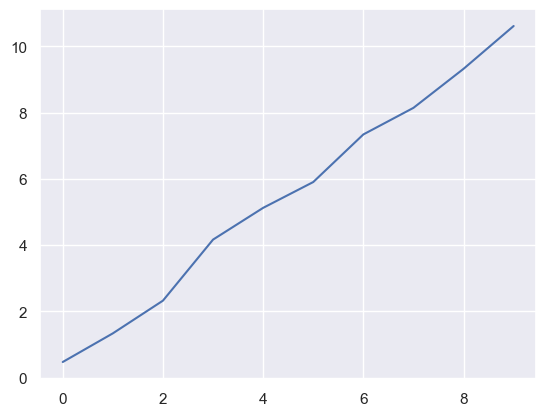

In [2]:
data = np.linspace(0,10,10)
noise = np.random.rand(10)
data += noise

plt.plot(data);

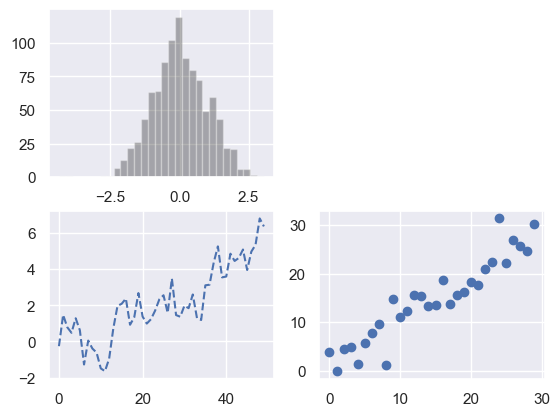

In [3]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax4 = fig.add_subplot(2,2,4)
ax3 = fig.add_subplot(2,2,3)

ax3.plot(np.random.standard_normal(50).cumsum(), '--')
ax1.hist(np.random.standard_normal(1000), bins=30, color="black", alpha=0.3)
ax4.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

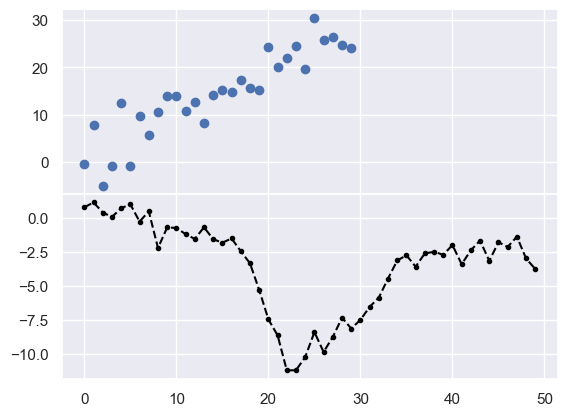

In [4]:
fig, axes = plt.subplots(2, 1, sharex=True)

fig.subplots_adjust(wspace=2, hspace=0)
axes[1].plot(np.random.standard_normal(50).cumsum(), '--', color='black', marker='.')
axes[0].scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

Text(0.5, 1.0, 'Just a title')

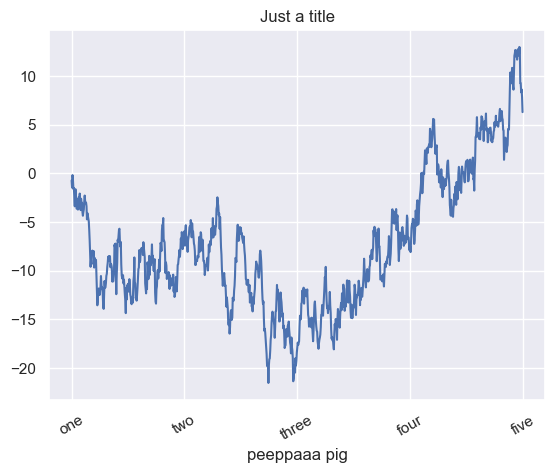

In [5]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())

ax.set_xlabel('peeppaaa pig')
ax.set_xticks(np.linspace(0,1000,5))
ax.set_xticklabels(['one','two','three','four','five'],
                   rotation=30, fontsize=11)

ax.set_title('Just a title')

In [6]:
from datetime import datetime

In [7]:
spx = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\data\py_4_dataana\spx.csv',
                  index_col=0, parse_dates=True)
spx.head()


,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [8]:
spx.loc[pd.to_datetime('2007-11-05')]

SPX    1502.17
Name: 2007-11-05 00:00:00, dtype: float64

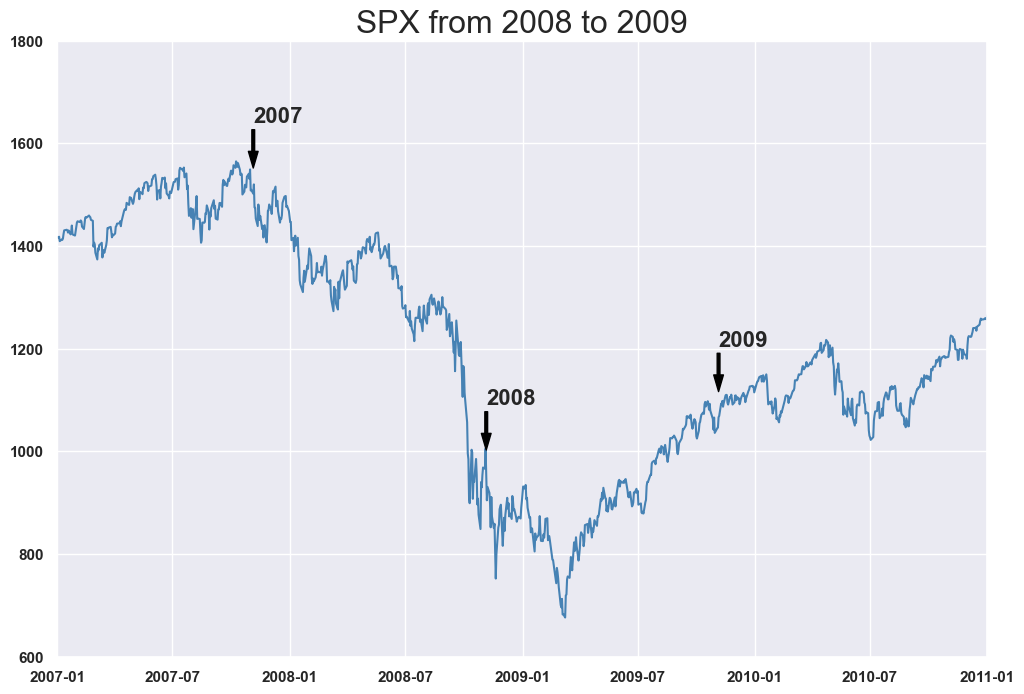

In [9]:
plt.rc("font", family="Arial", weight="bold", size=16)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(spx['SPX'], color='steelblue')

style = dict(size=17, color='black')

values = [
    ['2007-11-05', '2007'],
    ['2008-11-05', '2008'],
    ['2009-11-05', '2009']
]

for i in range(len(values)):

    when = (pd.to_datetime(values[i][0]))
    value = spx.loc[when].iloc[0]

    ax.annotate(
        values[i][1],xy=(when, value + 50), xytext=(when, value +170),
        arrowprops=dict(color='black', width=2, headwidth=7),
        ha="left", va="top"
            )


ax.set_title('SPX from 2008 to 2009', fontdict={'size':23})
start_date = pd.to_datetime("2007-01-01")
end_date = pd.to_datetime("2011-01-01")

ax.set_xlim([start_date, end_date])
ax.set_ylim([600, 1800]);

In [10]:
tips = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\data\py_4_dataana\tips.csv')

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [11]:
sum_tips = dict(tips.groupby('day')['total_bill'].sum())

In [12]:
sum_tips = dict(tips.groupby('day')['total_bill'].sum())

def get_perc(x):
    x['perc_bill'] = x['total_bill'] / sum_tips[x['day']]
    return x

tips = tips.apply(get_perc, axis=1)
tips.groupby('day')['perc_bill'].sum()

day
Fri     1.0
Sat     1.0
Sun     1.0
Thur    1.0
Name: perc_bill, dtype: float64

In [13]:
tips.head()

,total_bill,tip,smoker,day,time,size,perc_bill
0,16.99,1.01,No,Sun,Dinner,2,0.010442
1,10.34,1.66,No,Sun,Dinner,3,0.006355
2,21.01,3.50,No,Sun,Dinner,3,0.012912
3,23.68,3.31,No,Sun,Dinner,2,0.014553
4,24.59,3.61,No,Sun,Dinner,4,0.015112


In [14]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [15]:
dict(party_counts.sum(axis=1))

{'Thur': 58, 'Fri': 18, 'Sat': 85, 'Sun': 75}

In [16]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="rows")

party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='size'>

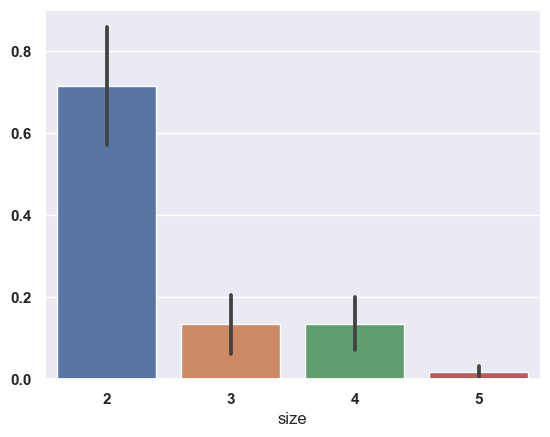

In [17]:
sns.barplot(party_pcts)

<Axes: xlabel='day'>

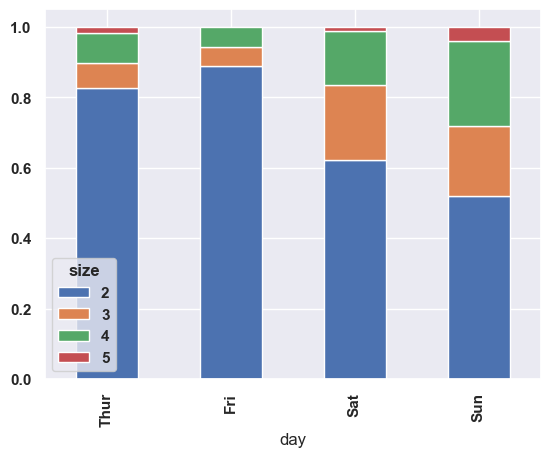

In [18]:
party_pcts.plot.bar(stacked=True)

In [23]:
party_pcts.reset_index()

size,day,2,3,4,5
0,Thur,0.827586,0.068966,0.086207,0.017241
1,Fri,0.888889,0.055556,0.055556,0.000000
2,Sat,0.623529,0.211765,0.152941,0.011765
3,Sun,0.520000,0.200000,0.240000,0.040000


In [25]:
party_pcts.reset_index().melt(id_vars='day')

,day,size,value
0,Thur,2,0.827586
1,Fri,2,0.888889
2,Sat,2,0.623529
3,Sun,2,0.520000
4,Thur,3,0.068966
5,Fri,3,0.055556
6,Sat,3,0.211765
7,Sun,3,0.200000
8,Thur,4,0.086207
9,Fri,4,0.055556


In [38]:
part_melt = party_pcts.reset_index().melt(id_vars='day')

In [73]:
part_melt['size'].unique()

array([2, 3, 4, 5])

In [ ]:
mask = part_melt['size'] == 2
plt.bar(
        part_melt.loc[mask, 'day'],
        part_melt.loc[mask, 'value'], label=n
               )

In [91]:
mask = part_melt['size'] == str(3)

print(part_melt.loc[mask, 'value'].reset_index(drop=True))

0    0.068966
1    0.055556
2    0.211765
3    0.200000
Name: value, dtype: float64


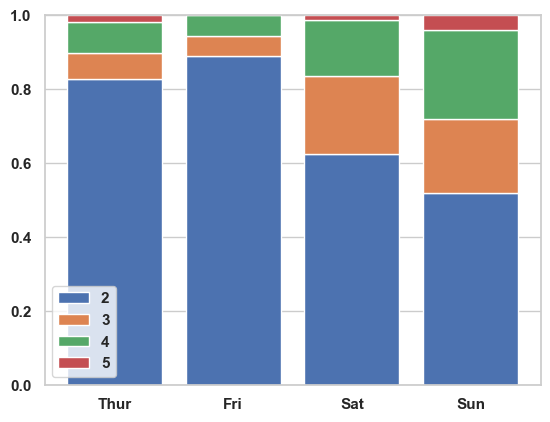

In [103]:
part_melt['size'] = part_melt['size'].astype('string')

fig, ax = plt.subplots()

bottom = np.zeros(4)

for n in part_melt['size'].unique():
    mask = part_melt['size'] == str(n)

    p = ax.bar(
        part_melt.loc[mask, 'day'],
        part_melt.loc[mask, 'value'], label=n,
        bottom=bottom
               )
    
    bottom += part_melt.loc[mask, 'value'].reset_index(drop=True)

plt.legend();